# 3D SARS-CoV-19 Protein Visualisation With Biopython

# 1.Import Modules

In [1]:
import Bio
import pylab
import urllib
import pandas as pd
import nglview as nv
from Bio.Seq import Seq
from Bio.Blast import NCBIWWW
from collections import Counter
from Bio.Data import CodonTable
from Bio import SeqIO, SearchIO
from Bio.PDB import PDBParser,MMCIFParser
from Bio.SeqUtils import GC,molecular_weight


### 2.1. Reading from file

In [2]:
# Loading FASTA file
seq_file_read=SeqIO.read("Sequence_data/sequence.fasta","fasta")
seq_file_read

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='MN908947.3', name='MN908947.3', description='MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

### 2.2 Sequence details

In [3]:
# list sequence details
for record in SeqIO.parse("Sequence_data/sequence.fasta","fasta"):
    print(record)

ID: MN908947.3
Name: MN908947.3
Description: MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')


In [4]:
# store sequence for later analysis
seqfromfile=record.seq
seqfromfile

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [5]:
# length of sequence
len(seqfromfile)

29903

In [6]:
#molecular weight
molecular_weight(seqfromfile)

9241219.214400413

In [7]:
#GC content using Biopython
GC(seqfromfile)

37.97277865097148

### 3.Translation

In [8]:
print(CodonTable.unambiguous_dna_by_id[1])

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [9]:
protein_seq=seqfromfile.translate()
protein_seq[:10]

C:\Users\Saye\anaconda3\lib\site-packages\Bio\Seq.py:2979: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


Seq('IKGLYLPR*Q')

In [10]:
len(protein_seq)

9967

In [11]:
len(seqfromfile)

29903

In [12]:
# Listing the most common amino acids
common_amino=Counter(protein_seq)
common_amino.most_common(10)

[('L', 886),
 ('S', 810),
 ('*', 774),
 ('T', 679),
 ('C', 635),
 ('F', 593),
 ('R', 558),
 ('V', 548),
 ('Y', 505),
 ('N', 472)]

Text(0, 0.5, 'frequency')

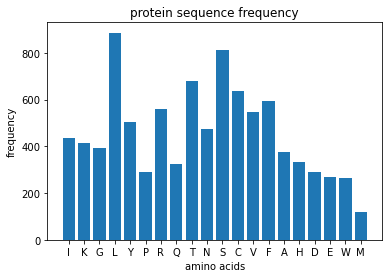

In [13]:
# visualize all 20 amino acid occurrences in the form of a histogram

del common_amino['*']
pylab.bar(common_amino.keys(),common_amino.values())
pylab.title('protein sequence frequency')
pylab.xlabel("amino acids")
pylab.ylabel("frequency")

### stop codon * signifies end of a protein, split the sequence using ( * ) to create a list of protein sequences

In [14]:
protein_list=[str(i) for i in protein_seq.split('*')]
protein_list[:10]

['IKGLYLPR',
 'QTNQLSISCRSVL',
 'TNFKICVAVTRLHA',
 'CTHAV',
 'LITNYCR',
 'QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER',
 'DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS',
 'RWHLWLSRS',
 'KRRFAST',
 'TALCVHQTFGCSNCTSWSCYG']

In [15]:
# convert sequences to dataframe
large_proteins=[x for x in protein_list if len(x)>10]
df=pd.DataFrame({'protein_seq':large_proteins})

In [16]:
# Add a column with sequence lengths
df['length']=df["protein_seq"].apply(len)
df.head()


,protein_seq,length
0,QTNQLSISCRSVL,13
1,TNFKICVAVTRLHA,14
2,QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER,35
3,DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS,46
4,TALCVHQTFGCSNCTSWSCYG,21


In [17]:
# sort sequence data

df.sort_values(by=["length"],ascending=False)[:10]

,protein_seq,length
118,CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFL...,2701
157,ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRA...,290
168,TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNS...,123
158,AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALR...,83
167,QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSL...,63
3,DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS,46
93,TMLRCYFPKCSEKNNQGYTPLVVTHNFDFTFSFSPEYSMVFVLFFV,46
188,KSHHIFTEATRSTIECTVNNARESCLYGRALMCKINFSSAIPM,43
116,DVVYTHWYWSGNNSYTGSQYGSRILWWCIVLSVLPLPHRSSKS,43
182,LQTLAANCTICPQRFSVLRNVAHWHGSHTFGNVVDLHRCHQIG,43


In [18]:

one_large_protein=df.nlargest(1,"length")
single_prot=one_large_protein.iloc[0,0]
single_prot

'CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQEKDEDDNLIDSYFVVKRHTFSNYQHEETIYNLLKDCPAVAKHDFFKFRIDGDMVPHISRQRLTKYTMADLVYALRHFDEGNCDTLKEILVTYNCCDDDYFNKKDWYDFVENPDILRVYANLGERVRQALLKTVQFCDAMRNAGIVGVLTLDNQDLNGNWYDFGDFIQTTPGSGVPVVDSYYSLLMPILTLTRALTAESHVDTDLTKPYIKWDLLKYDFTEERLKLFDRYFKYWDQTYHPNCVNCLDDRCILHCANFNVLFSTVFPPTSFGPLVRKIFVDGVPFVVSTGYHFRELGVVHNQDVNLHSSRLSFKELLVYAADPAMHAASGNLLLDKRTTCFSVAALTNNVAFQTVKPGNFNKDFYDFAVSKGFFKEGSSVELKHFFFAQDGNAAISDYDYYRYNLPTMCDIRQLLFVVEVVDKYFDCYDGGCINANQVIVNNLDKSAGFPFNKWGKARLYYDSMSYEDQDALFAYTKRNVIPTITQMNLKYAISAKNRARTVAGVSICSTMTNRQFHQKLLKSIAATRGATVVIGTSKFYGGWHNMLKTVYSDVENPHLMGWDYPKCDRAMPNMLRIMASLVLARKHTTCCSLSHRFYRLANECAQVLSEMVMCGGSLYVKPGGTSSGDATTAYANSVFNICQAVTANVNALLSTDGNKIADKYVRNLQHRLYECLYRNRDVDTDFVNEFYAYLRKHFSMMILSDDAVVCFNSTYASQGLVASIKNFKSVLYYQNNVFMSEAKCWTETDLTKGPHEFCSQHTMLVKQGDDYVYLPYPDPSRILGAGCFVDDIVKTDGTLMIERFVSLAIDAYPLTKHPNQEYADVFHLYLQYIRKLHDELTGHMLDMYSVMLTNDNTSRYWEPEFYEAMYTPHTVLQAVGACVLCNSQTSLRCGACIRRPFLCCKCCYDHVISTSHKLVLSVNPYVCNAPGCDVTDVTQLYLGGMSY

In [19]:
# write to a file

with open("Sequence_data/single_prot.fasta","w") as file:
    file.write(">large protein\n"+single_prot)

## 4. Basic Local Alignment Using NCBI-BLAST

In [20]:
# Read single_seq.fasta

read =SeqIO.read("Sequence_data/single_prot.fasta","fasta")
read.seq

Seq('CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQ...VNN')

In [21]:
%%time
result_handle=NCBIWWW.qblast("blastp","pdb",read.seq)
blast_qresult=SearchIO.read(result_handle,"blast-xml")

Wall time: 1min 5s


In [22]:
print(blast_qresult[0:5])

Program: blastp (2.13.0+)
  Query: unnamed (2701)
         protein product
 Target: pdb
   Hits: ----  -----  ----------------------------------------------------------
            #  # HSP  ID + description
         ----  -----  ----------------------------------------------------------
            0      1  pdb|7D4F|A  Chain A, RNA-directed RNA polymerase [Sever...
            1      1  pdb|6YYT|A  Chain A, nsp12 [Severe acute respiratory sy...
            2      1  pdb|6XEZ|A  Chain A, RNA-directed RNA polymerase [Sever...
            3      1  pdb|7BW4|A  Chain A, RNA-directed RNA polymerase [Sever...
            4      1  pdb|6XQB|A  Chain A, RNA-directed RNA polymerase [Sever...


In [23]:
#fetch the id, description, evalue, bitscore & alignment of first hit

seqid = blast_qresult[1]

details = seqid[0]

print(f"\
Sequence ID:{seqid.id}\n\
description:{seqid.description}\n\
E value:    {details.evalue} \n\
Bit Score:  {details.bitscore}\n\
")

Sequence ID:pdb|6YYT|A
description:Chain A, nsp12 [Severe acute respiratory syndrome coronavirus 2]
E value:    0.0 
Bit Score:  1938.31



In [24]:
print(f"alignment:\n{details.aln}")

alignment:
Alignment with 2 rows and 925 columns
FKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKT...VLQ unnamed
LNRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKT...VLQ pdb|6YYT|A


### 5. Read PDB file

### 5.1 Retreiving PDB Structure From RCSB PDB

In [25]:
seqid.id

'pdb|6YYT|A'

In [26]:
# split seqid

seqid.id.split('|')[1]

'6YYT'

In [27]:


urllib.request.urlretrieve('https://files.rcsb.org/download/6YYT.pdb','Sequence_data/6YYT.pdb')

('Sequence_data/6YYT.pdb', <http.client.HTTPMessage at 0x16795e48880>)

### 5.2 Reading PDB file

In [28]:
parser=PDBParser()
structure=parser.get_structure("6YYT","Sequence_data/6YYT.pdb")
structure

C:\Users\Saye\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12059.
  warnings.warn(


<Structure id=6YYT>

### 5.3 Identifying the number of chains

In [29]:
for chain in structure[0]:
    print(f"chain ID:{chain.id}")

chain ID:A
chain ID:B
chain ID:C
chain ID:D
chain ID:P
chain ID:Q
chain ID:T
chain ID:U


## 6.1 Visualizing SARS-CoV-19 Protein structure

In [30]:
view=nv.show_biopython(structure)
view

NGLWidget()

In [31]:
view.render_image()

Image(value=b'', width='99%')

### 6.2. nglview GUI

In [32]:
#GUI
nv.show_biopython(structure,gui=True)

NGLWidget()

## Observation:<br>
<div style="Font-size:16px">
A. Length 29903 base pairs<br>
B. GC content 37.97<br>
C. Protein content has high L & the largest protein is of length 2701 Amino acid<br>
D. Largest protein BLAST results corresponds to <b>SARS-CoV-19</b> 6YYT <br>
E. Protein 6YYT has 8 chains & a RNA binding domain<br>
</div>